`Problem`<br>
What is the probability of two people in the same room sharing the same birthday?
- Given K people, find the probability
- If K > 365 then probability = 1
___

**Recipe**
1. Randomly generate K number of birthdays
2. Check if at least one birthday repeats in a `list`
3. Simulate K for 10,000 times
4. Execute from K = 2 to K = 50

In [1]:
# Define inputs/constraints here

import numpy as np

max_k        = 50
k_range      = np.arange(start = 2, stop = max_k + 1, step = 1, dtype = int)
n_iterations = 10000

In [2]:
# Define functions

def generate_birthdays(k):
    return np.random.randint(low = 1, high = 366, size = k)
def check_repeat_birthdays(birthdays):
    return len(birthdays) != len(set(birthdays))
def sim_BirthdayProblem(k, n_iterations):
    is_repeat_birthdays = []
    
    for _ in range(n_iterations):
        birthdays = generate_birthdays(k)
        is_repeat = check_repeat_birthdays(birthdays)
        is_repeat_birthdays.append(is_repeat)
        
    n_repeat = len([True for value in is_repeat_birthdays if value])
    n_total  = len(is_repeat_birthdays)
    
    return np.around((n_repeat/n_total)*100, 1)

In [3]:
# Store results in a list

repeat_probabilities = [sim_BirthdayProblem(k, n_iterations) for k in k_range]

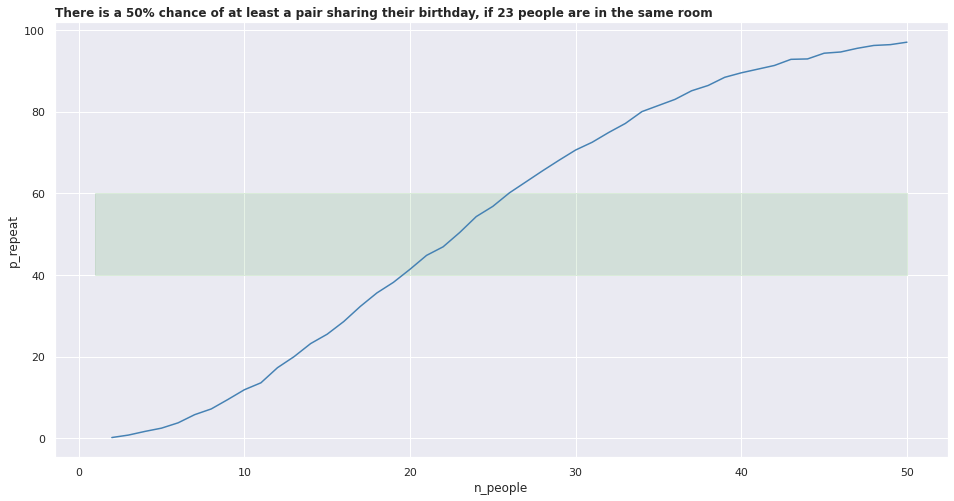

In [33]:
# Visualize data using a lineplot

## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Store data into a DataFrame
data = pd.DataFrame({'n_people': k_range, 'p_repeat': repeat_probabilities})

## Instantialize plot area
fig  = plt.figure(figsize = (16,8))
ax   = fig.add_subplot(111)

## Fill between space
ax.fill_between(np.linspace(1,50,50), 40, 60, alpha = 0.1, color = 'green')

## Plot data
sns.lineplot(data = data, 
             x = 'n_people', y = 'p_repeat', 
             ax = ax, color = 'steelblue', markers = 'x')

## Set title
target_pct          = 50
n_people_for_chance = sorted(data.loc[data['p_repeat'] >= target_pct, 'n_people'].values.tolist())[0]
title               = 'There is a {:.0%} chance of at least a pair sharing their birthday, if {} people are in the same room'.format(target_pct/100, n_people_for_chance)
ax.set_title(title, fontweight = 'bold', fontsize = 12, loc = 'left')

## Draw horizontal line at 50%
# ax.axhline(target_pct, linestyle = '--', linewidth = 1, color = 'g')

## Show output
plt.show()